In [4]:
!pip install minisom
from minisom import MiniSom  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [5]:
df = pd.read_csv(r"C:\Users\Jackson\Desktop\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

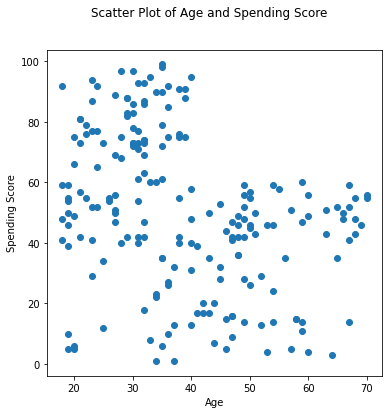

In [6]:
age = df['Age'].tolist()
spending_score = df['Spending Score (1-100)'].tolist()
fig = plt.figure(figsize=(6,6))
plt.scatter(age, spending_score)
plt.suptitle("Scatter Plot of Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

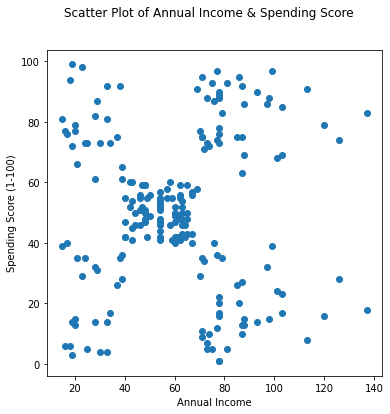

In [14]:
annual_income = df['Annual Income (k$)'].tolist()
spending_score = df['Spending Score (1-100)'].tolist()
fig = plt.figure(figsize=(6,6))
plt.scatter(annual_income, spending_score)
plt.suptitle("Scatter Plot of Annual Income & Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [9]:
# Select Annual Income and Spending Score as our features
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Transform features to list
data = features.values
data.shape

(200, 2)

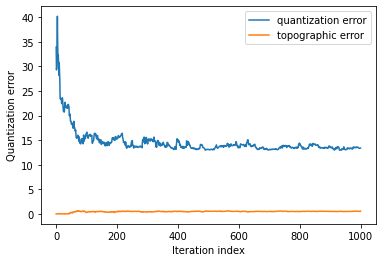

In [10]:
# I use linear som topography
som_shape = (1, 5)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=0.5)
max_iter = 1000
q_error = []
t_error = []
for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))
plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()


In [16]:
 q_error

[33.94492721341062,
 29.296192614098736,
 29.798388678816764,
 34.506441306321214,
 40.22335748740603,
 34.306769985513846,
 31.57986978260612,
 32.4148833656896,
 30.22769497891563,
 28.223796966162308,
 30.807039219963197,
 29.1817926315738,
 27.103829887465363,
 23.45233193494134,
 23.476769811547097,
 23.339187294299236,
 23.46417562759713,
 23.183541970893508,
 22.44157935415922,
 22.7121484307272,
 23.634587373348833,
 23.463475432018313,
 22.129506996613294,
 21.41171956169921,
 20.861440879771962,
 21.103148561585655,
 20.73137302084133,
 20.7612311696107,
 22.54029973737027,
 22.716239961109626,
 22.230355500857414,
 21.78421741347621,
 21.741006827720867,
 21.61002481571213,
 21.914129168491826,
 21.822712290113586,
 21.587939578507548,
 21.47777816133626,
 22.221931457747022,
 22.265933290527272,
 22.27370310479872,
 21.979810851594056,
 21.86488749108853,
 20.06038288608864,
 19.9921042327833,
 20.345557959135537,
 19.724992882681878,
 18.844257076345993,
 18.88143856965679

In [15]:
t_error

[0.0,
 0.0,
 0.0,
 0.025,
 0.045,
 0.025,
 0.02,
 0.025,
 0.04,
 0.055,
 0.055,
 0.055,
 0.055,
 0.055,
 0.055,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.015,
 0.015,
 0.05,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.04,
 0.005,
 0.05,
 0.065,
 0.07,
 0.03,
 0.05,
 0.045,
 0.045,
 0.155,
 0.295,
 0.295,
 0.275,
 0.27,
 0.315,
 0.315,
 0.225,
 0.19,
 0.195,
 0.4,
 0.4,
 0.42,
 0.405,
 0.385,
 0.465,
 0.45,
 0.42,
 0.47,
 0.45,
 0.52,
 0.53,
 0.54,
 0.485,
 0.55,
 0.615,
 0.59,
 0.58,
 0.61,
 0.51,
 0.56,
 0.54,
 0.55,
 0.53,
 0.55,
 0.515,
 0.485,
 0.445,
 0.51,
 0.515,
 0.51,
 0.54,
 0.605,
 0.54,
 0.52,
 0.505,
 0.55,
 0.55,
 0.575,
 0.49,
 0.43,
 0.415,
 0.36,
 0.36,
 0.315,
 0.305,
 0.29,
 0.365,
 0.385,
 0.38,
 0.405,
 0.42,
 0.455,
 0.45,
 0.425,
 0.475,
 0.435,
 0.425,
 0.465,
 0.485,
 0.445,
 0.43,
 0.44,
 0.46,
 0.465,
 0.485,
 0.49,
 0.52,
 0.535,
 0.49,
 0.405,
 0.4,
 0.36,
 0.37,
 0.355,
 0.475,
 0.48,
 0.5,
 0.51,
 0.495,
 0.495,
 0.49,
 0.5,


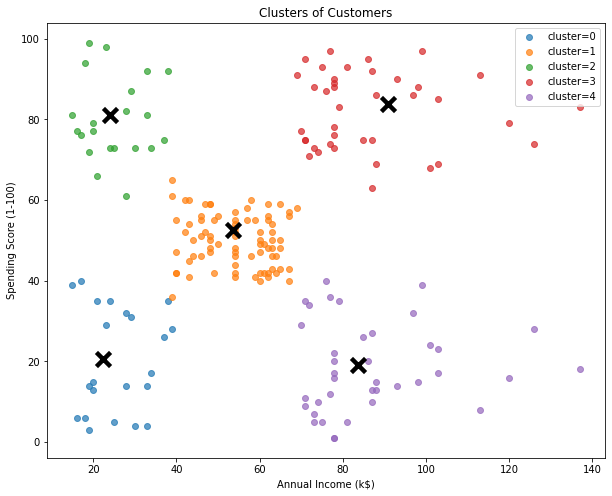

In [11]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
# Plotting the clusters 
plt.figure(figsize=(10,8))
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
# Plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'    
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend();

#### 5 cluster of customers based on the annual income and spending score :
#### Cluster 0 : High income low spender,Cluster 1 : High income high spender
#### ,Cluster 2 : Low income high spender,Cluster 3 : Medium income medium spender Cluster 4 : Low income low spender